# Project: **Name of method** in **name of software**

## Group members
* Luke Conley Bakken - \<contribution\>
* Alison Kessenich - \<contribution\>
* Noah Lane - \<contribution\>
* Dennis Nguyen - \<contribution\>

This notebook is a blank slate for you to write in.  Feel free to include figures (don't forget to add/commit them to your repository) and examples.  You can change the kernel (from `Python 3`; see upper right) if the open source project you're writing about does not use Python.  You can write from the prompts below or delete all the cells and start fresh.  Note that Git will always contain your history.

You can run shell commands:

In [1]:
! ls

project.ipynb  README.md  RootFinding


and include code snippets

```c
double square(double x) {
    return x*x;
}
```
or code cells

In [2]:
def square(x):
    return x*x

print(f'square(3) = {square(3)}')

square(3) = 9


The following prompts may be useful, but you don't have to use them.

## Introduction

Describe the objective of your study, citing prior work as appropriate (papers, websites, etc.).  There is no requirement on citation style, but please try to be consistent.

## Methods

## Results and interpretation

## Conclusions and open questions

In [10]:
! git clone https://github.com/tylerjarvis/RootFinding

fatal: destination path 'RootFinding' already exists and is not an empty directory.


In [11]:
! pip install -e ./RootFinding

Obtaining file:///home/jovyan/numcomp-class/numcomp-team-project-group_project_csci_3656_team_c/RootFinding
  Attempting uninstall: RootFinding
    Found existing installation: RootFinding 0.1.0
    Uninstalling RootFinding-0.1.0:
      Successfully uninstalled RootFinding-0.1.0
  Running setup.py develop for RootFinding


In [10]:
import numpy as np
import yroots as yr
from matplotlib import pyplot as plt

In [11]:
%matplotlib inline

The following is a working example of how to use polyroots to find the roots of the functions
$$f(x,y) = y^2 + 3xy - 4x +1$$$$g(x,y) = -6xy -2x^2 + 6y +3.$$

In [12]:
#direct construction of polynomials with coefficient tensors
f = yr.MultiPower(np.array([[1, -4, 0],[0, 3, 0],[1, 0, 0]]))
g = yr.MultiPower(np.array([[3, 0, -2],[6, -6, 0],[0, 0, 0]]))

#solve and time
%time roots = yr.polysolve([f,g], return_all_roots=True)
#show the number of roots and maximal residuals
roots.shape[0],np.max(np.abs(f(roots))),np.max(np.abs(g(roots)))

CPU times: user 4.64 ms, sys: 177 µs, total: 4.82 ms
Wall time: 3.95 ms


(4, 6.750155989720952e-14, 6.750155989720952e-14)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


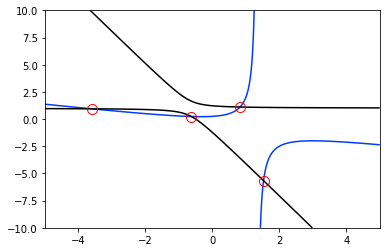

In [13]:
#plot f,g and roots
x = np.linspace(-5,5,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
plt.contour(X,Y,f(np.array(list(zip(X,Y)))),levels=[0],colors='#003cff')
plt.contour(X,Y,g(np.array(list(zip(X,Y)))),levels=[0],colors='k')
plt.plot(roots[:,0],roots[:,1],'o',color='none',markeredgecolor='r',markersize=10)

Now, the goal is to make polysolve not solve correctly. The function is stated to be unstable when the absolute value of each coordinate is less than 1. 